In [181]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data


In [182]:
mnist=input_data.read_data_sets("/tmp/data/",one_hot=True)

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


In [183]:
mnist.train.images.shape

(55000, 784)

[ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]
the number is 3


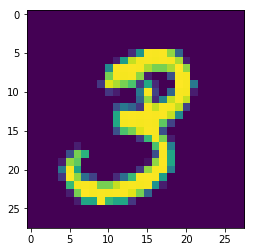

In [184]:
print(mnist.train.labels[1])
print ('the number is %d' % mnist.train.labels[1].argmax())
plt.imshow(mnist.train.images[1].reshape([28,28]))

In [185]:
# parameters
n_input=784
n_classes=10
n_hidden_nodes=512
x=tf.placeholder(tf.float32,shape=[None,n_input])
y=tf.placeholder(tf.float32,shape=[None,n_classes])

In [186]:
weights={
    'w':tf.Variable(tf.random_normal([n_input,n_hidden_nodes])),
    'out':tf.Variable(tf.random_normal([n_hidden_nodes, n_classes]))
    
}
biases={
    'b':tf.Variable(tf.random_normal([n_hidden_nodes])),
    'out':tf.Variable(tf.random_normal([n_classes]))
}

In [187]:

input_layer=tf.matmul(x,weights['w'])
hidden_layer = tf.nn.relu(input_layer+biases['b'])
out_layer=tf.matmul(hidden_layer,weights['out']) + biases['out']

In [188]:
# use in measuring our progress in gradient descent
# cross-entropy, which applies a logarithmic scale to penalize incorrect classifications much more than ones that are close
# comparing out_layer and y
loss_function = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=out_layer, labels=y))


In [189]:
# learning rate=0.5(agressive)
optimizer = tf.train.GradientDescentOptimizer(0.5).minimize(loss_function)

In [190]:
correct_prediction = tf.equal(tf.argmax(out_layer,1), tf.argmax(y,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))

In [191]:
tf.global_variables_initializer().run()

In [192]:
mnist.test.images

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]], dtype=float32)

In [193]:
mnist.test.labels

array([[ 0.,  0.,  0., ...,  1.,  0.,  0.],
       [ 0.,  0.,  1., ...,  0.,  0.,  0.],
       [ 0.,  1.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [194]:
mnist.train.next_batch(0)

(array([], shape=(0, 784), dtype=float32),
 array([], shape=(0, 10), dtype=float64))

In [195]:
for i in range (2000):
    batch=mnist.train.next_batch(100)
    optimizer.run(feed_dict={x:batch[0], y:batch[1]})
    if((i+1)%100==0):
        accuracy_eval=accuracy.eval(feed_dict={x: mnist.test.images, y: mnist.test.labels})
        print ('Training epoch :' + str(i+1))
        print('Accuracy = ' + str(accuracy_eval))


Training epoch :100
Accuracy = 0.8518
Training epoch :200
Accuracy = 0.8676
Training epoch :300
Accuracy = 0.8843
Training epoch :400
Accuracy = 0.8873
Training epoch :500
Accuracy = 0.893
Training epoch :600
Accuracy = 0.8974
Training epoch :700
Accuracy = 0.9004
Training epoch :800
Accuracy = 0.903
Training epoch :900
Accuracy = 0.9016
Training epoch :1000
Accuracy = 0.9131
Training epoch :1100
Accuracy = 0.9171
Training epoch :1200
Accuracy = 0.9182
Training epoch :1300
Accuracy = 0.9185
Training epoch :1400
Accuracy = 0.9175
Training epoch :1500
Accuracy = 0.9229
Training epoch :1600
Accuracy = 0.9193
Training epoch :1700
Accuracy = 0.9212
Training epoch :1800
Accuracy = 0.9243
Training epoch :1900
Accuracy = 0.924
Training epoch :2000
Accuracy = 0.9289


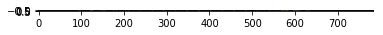

In [196]:
plt.imshow(mnist.test.images[1,:].reshape(1,784))

In [198]:
#init must place before sess
init=tf.initialize_all_variables()

# lunch the session
sess=tf.InteractiveSession()
# intilialize all the variables
sess.run(init)

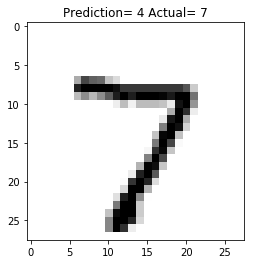

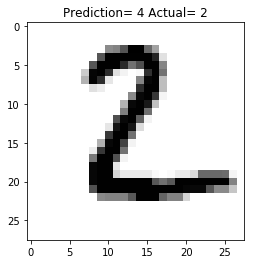

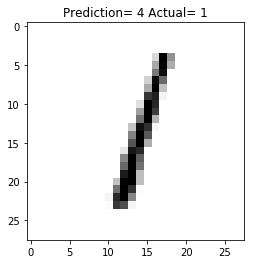

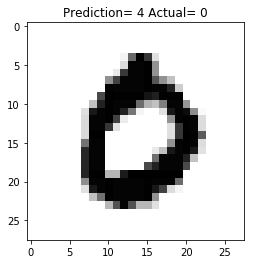

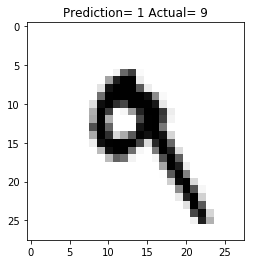

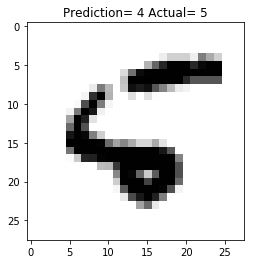

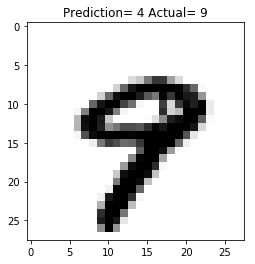

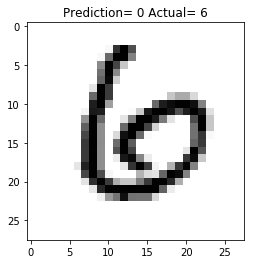

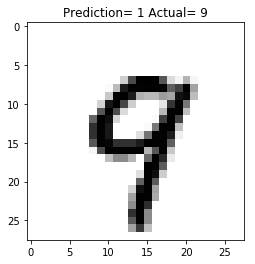

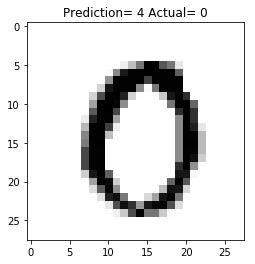

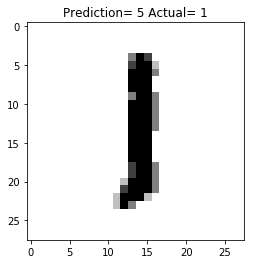

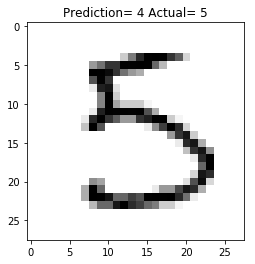

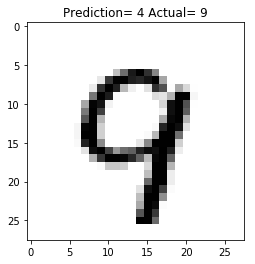

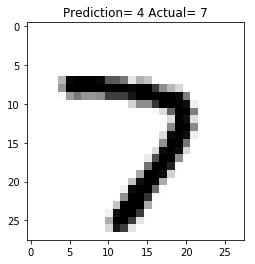

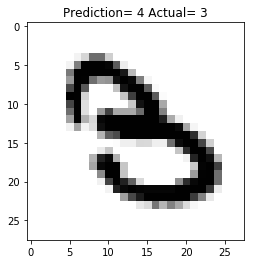

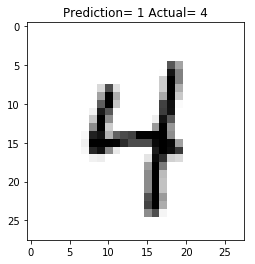

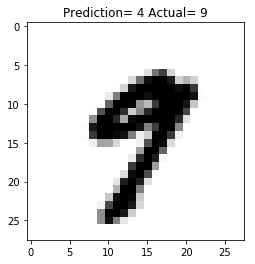

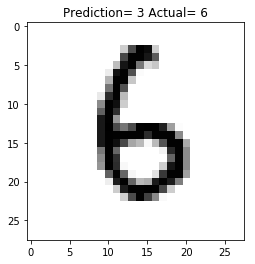

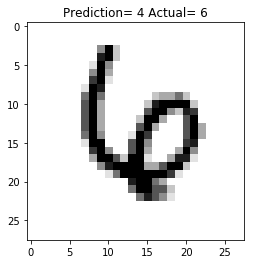

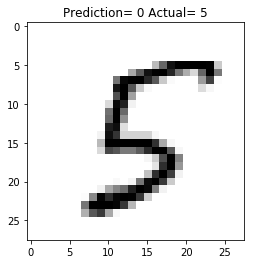

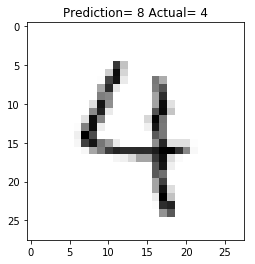

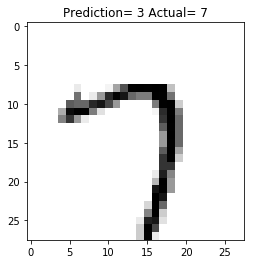

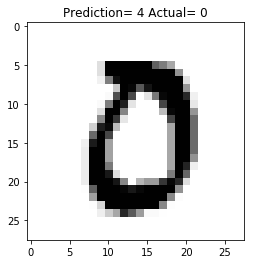

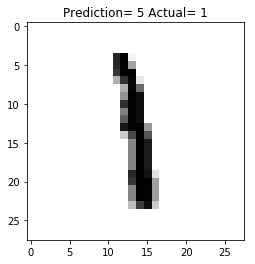

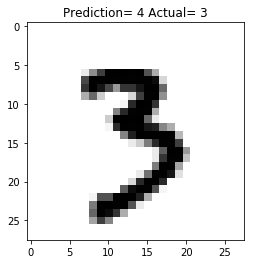

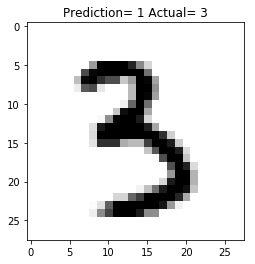

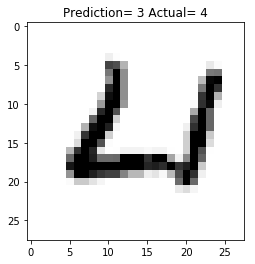

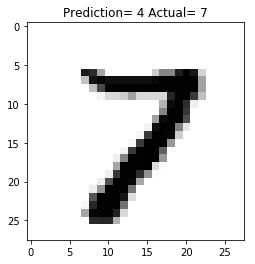

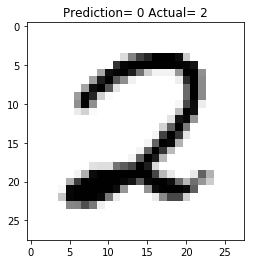

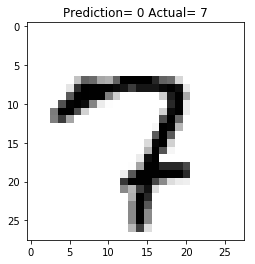

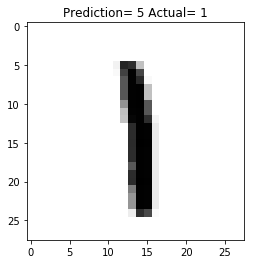

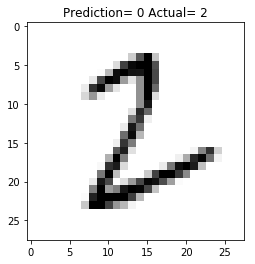

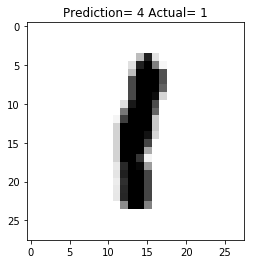

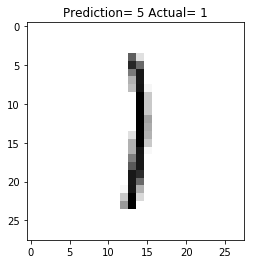

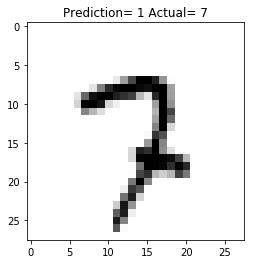

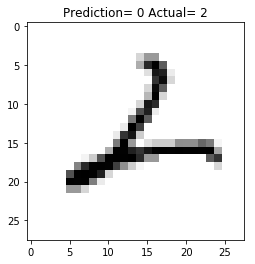

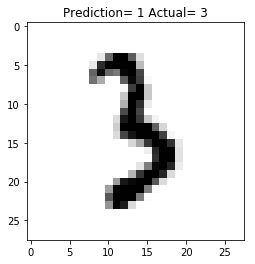

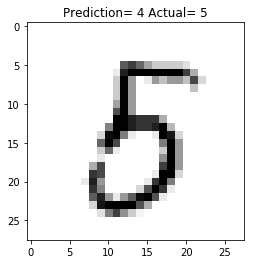

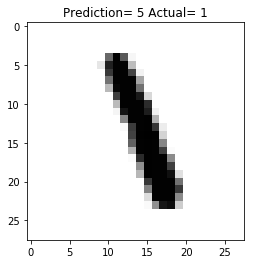

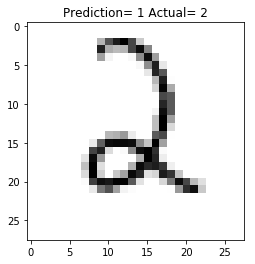

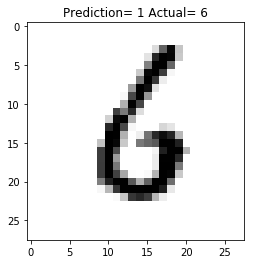

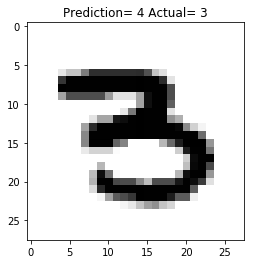

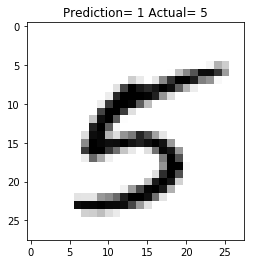

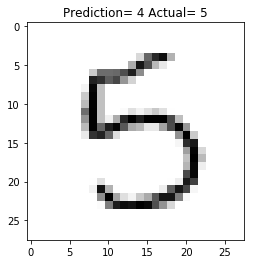

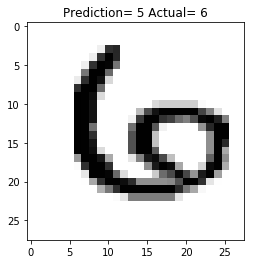

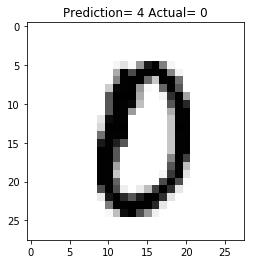

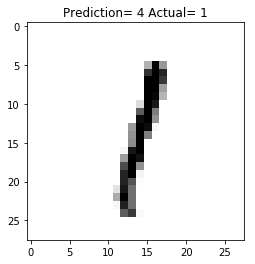

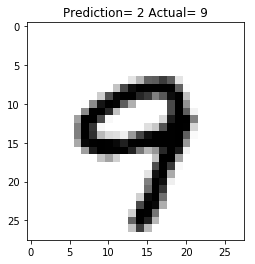

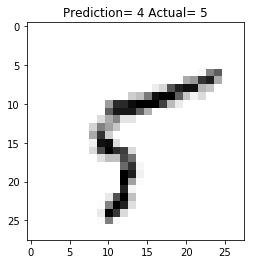

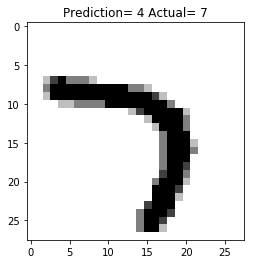

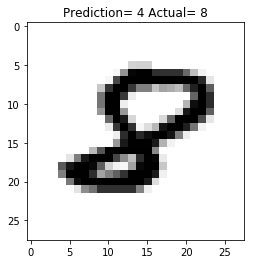

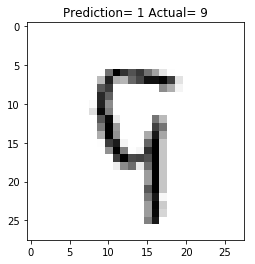

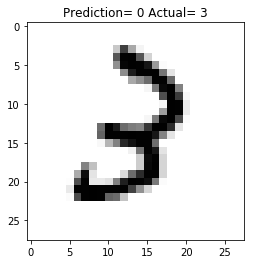

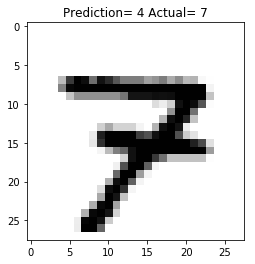

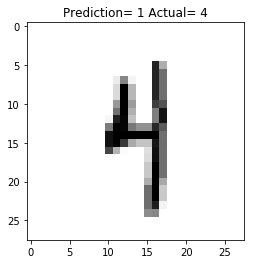

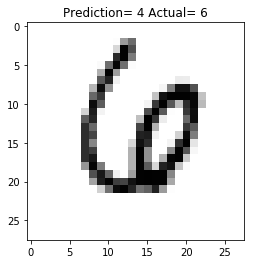

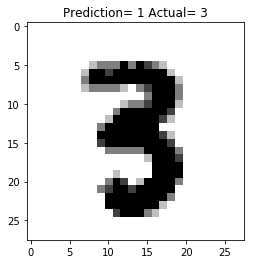

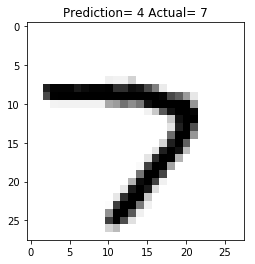

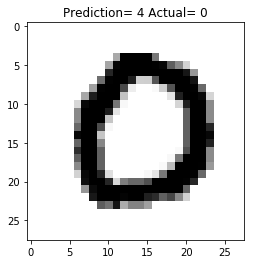

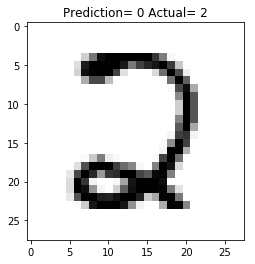

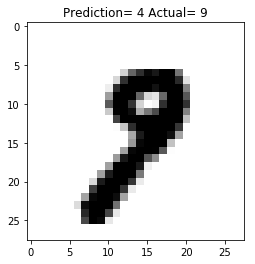

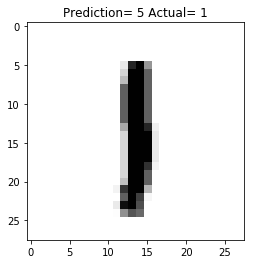

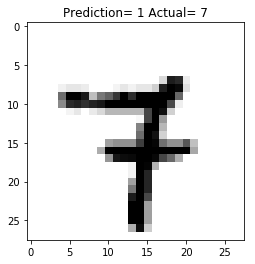

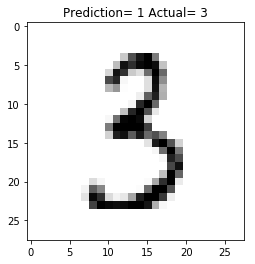

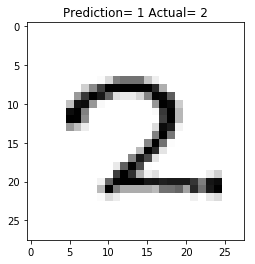

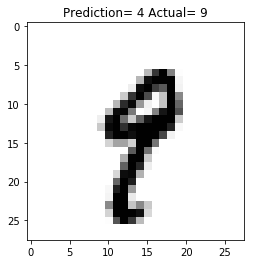

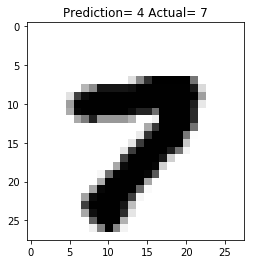

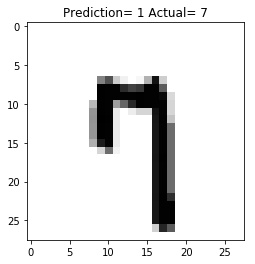

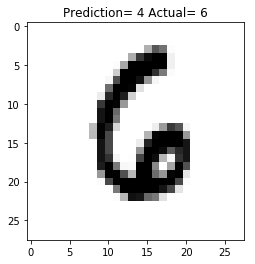

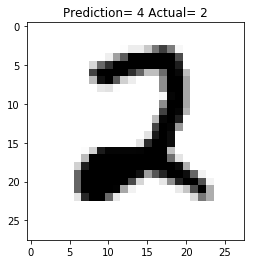

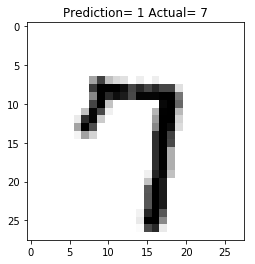

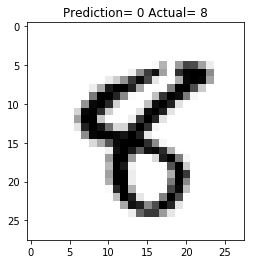

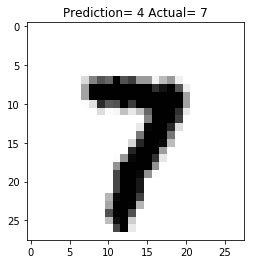

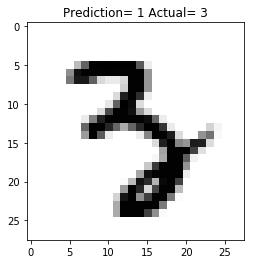

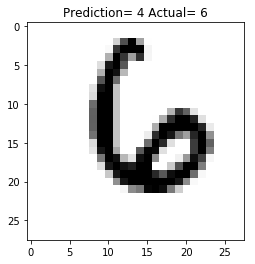

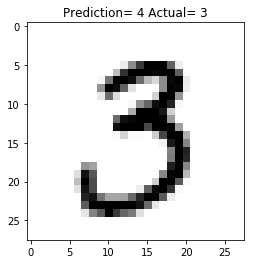

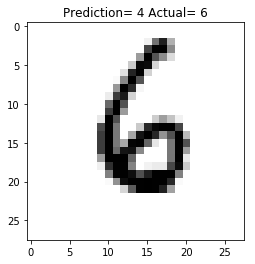

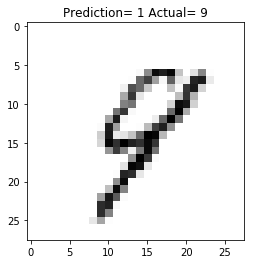

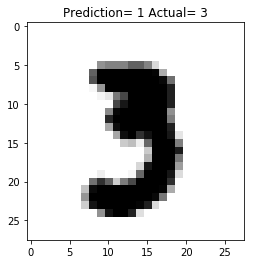

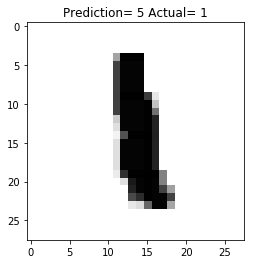

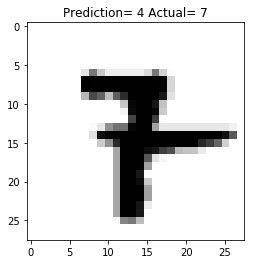

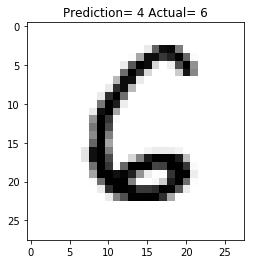

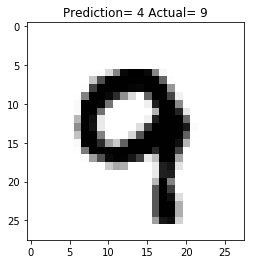

In [211]:
for i in range(100):
    x_train=mnist.test.images[i,:].reshape(1,784)
    y_train=mnist.test.labels[i,:]
    label=y_train.argmax()
    prediction=sess.run(out_layer,feed_dict={x: x_train}).argmax()
    if (prediction != label) :
        plt.title('Prediction= %d Actual= %d' % (prediction, label))
        plt.imshow(x_train.reshape([28,28]), cmap=plt.get_cmap('gray_r'))
        plt.show()